## 10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

### (a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.
* Hint: There are a number of functions in Python that you can use to generate data. One example is the normal() method of the random() function in numpy; the uniform() method is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [22]:
import numpy as np
import pandas as pd

np.random.seed(42)

class1 = np.random.normal(loc=0, scale=1, size=(20, 50))

class2 = np.random.normal(loc=5, scale=1, size=(20, 50))

class3 = np.random.normal(loc=10, scale=1, size=(20, 50))

data = np.vstack([class1, class2, class3])

df = pd.DataFrame(data)
df['class'] = [1]*20 + [2]*20 + [3]*20

print(df.head())

df.head()

          0         1         2         3         4         5         6  \
0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1  0.324084 -0.385082 -0.676922  0.611676  1.031000  0.931280 -0.839218   
2 -1.415371 -0.420645 -0.342715 -0.802277 -0.161286  0.404051  1.886186   
3  0.250493  0.346448 -0.680025  0.232254  0.293072 -0.714351  1.865775   
4  0.357787  0.560785  1.083051  1.053802 -1.377669 -0.937825  0.515035   

          7         8         9  ...        41        42        43        44  \
0  0.767435 -0.469474  0.542560  ...  0.171368 -0.115648 -0.301104 -1.478522   
1 -0.309212  0.331263  0.975545  ...  0.968645 -0.702053 -0.327662 -0.392108   
2  0.174578  0.257550 -0.074446  ...  1.307143 -1.607483  0.184634  0.259883   
3  0.473833 -1.191303  0.656554  ...  0.856399  0.214094 -1.245739  0.173181   
4  0.513786  0.515048  3.852731  ... -0.114736  0.504987  0.865755 -1.200296   

         45        46        47        48        49  class  
0 -0.71

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,class
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,...,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,1
1,0.324084,-0.385082,-0.676922,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545,...,0.968645,-0.702053,-0.327662,-0.392108,-1.463515,0.296120,0.261055,0.005113,-0.234587,1
2,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,0.404051,1.886186,0.174578,0.257550,-0.074446,...,1.307143,-1.607483,0.184634,0.259883,0.781823,-1.236951,-1.320457,0.521942,0.296985,1
3,0.250493,0.346448,-0.680025,0.232254,0.293072,-0.714351,1.865775,0.473833,-1.191303,0.656554,...,0.856399,0.214094,-1.245739,0.173181,0.385317,-0.883857,0.153725,0.058209,-1.142970,1
4,0.357787,0.560785,1.083051,1.053802,-1.377669,-0.937825,0.515035,0.513786,0.515048,3.852731,...,-0.114736,0.504987,0.865755,-1.200296,-0.334501,-0.474945,-0.653329,1.765454,0.404982,1


### (b) Perform PCA on the 60 observations and plot the first two prin- cipal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

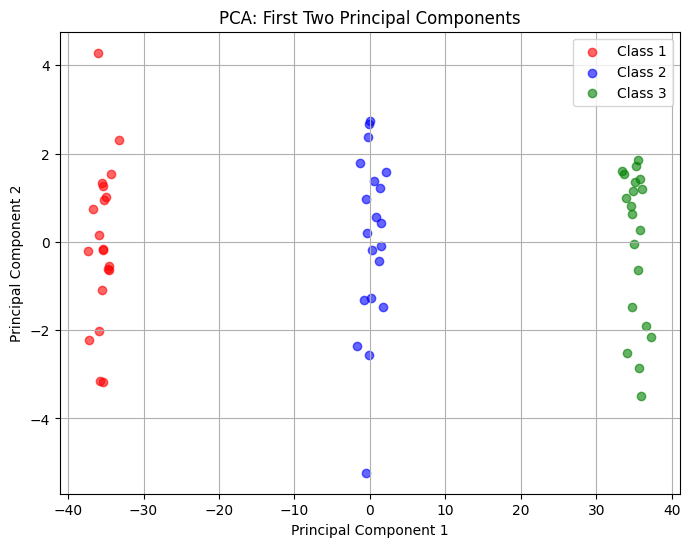

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.iloc[:, :-1])

pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['class'] = df['class']

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for label, color in zip([1, 2, 3], colors):
    plt.scatter(pc_df.loc[pc_df['class'] == label, 'PC1'],
                pc_df.loc[pc_df['class'] == label, 'PC2'],
                color=color, label=f'Class {label}', alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()


### (c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?
* Hint: You can use the pd.crosstab() function in Python to com- pare the true class labels to the class labels obtained by cluster- ing. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [24]:
from sklearn.cluster import KMeans
import pandas as pd

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans_labels = kmeans.fit_predict(df.iloc[:, :-1].rename(columns=str))

df['kmeans_label'] = kmeans_labels

comparison = pd.crosstab(df['class'], df['kmeans_label'], rownames=['True Class'], colnames=['K-means Cluster'])


comparison

K-means Cluster,0,1,2
True Class,,,
1,0,0,20
2,20,0,0
3,0,20,0


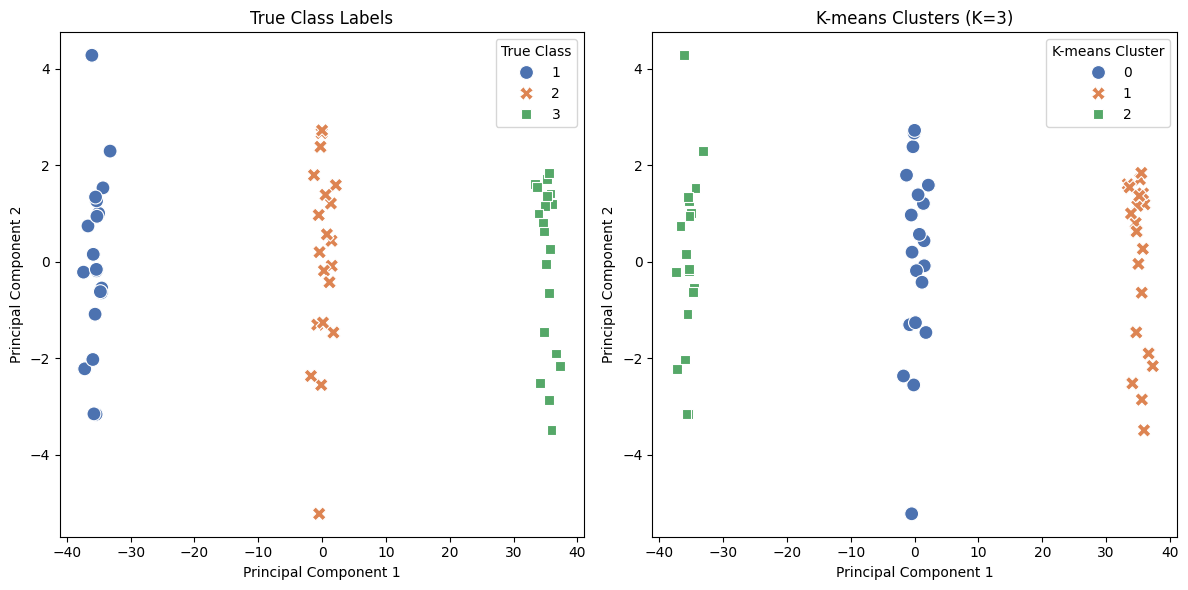

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, :-2].rename(columns=str))  # Exclude 'class' and 'kmeans_label'

df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='class', data=df, palette='deep', style='class', s=100)
plt.title('True Class Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='True Class')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='kmeans_label', data=df, palette='deep', style='kmeans_label', s=100)
plt.title('K-means Clusters (K=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-means Cluster')

plt.tight_layout()
plt.show()


K-means ：sklearn.cluster.KMeans 來對觀測值進行聚類，設定了 3 個cluster center (n_clusters=3)。
生成label：fit_predict() 方法會根據觀測值計算並生成 K-means cluster label，這些標籤會添加到 DataFrame 中作為新的row。
結果比較：使用 pd.crosstab() 函數將 K-means 聚類標籤與真實的cluster label進行比較。表格顯示每個真實類別對應的cluster標籤分佈情況。

### (d) Perform K-means clustering with K = 2. Describe your results.


In [26]:
from sklearn.cluster import KMeans
import pandas as pd

kmeans_2 = KMeans(n_clusters=2, random_state=42)

kmeans_labels_2 = kmeans_2.fit_predict(df.iloc[:, :-2].rename(columns=str))

df['kmeans_label_2'] = kmeans_labels_2

comparison_2 = pd.crosstab(df['class'], df['kmeans_label_2'], rownames=['True Class'], colnames=['K-means Cluster (K=2)'])

comparison_2


K-means Cluster (K=2),0,1
True Class,,
1,20,0
2,20,0
3,0,20


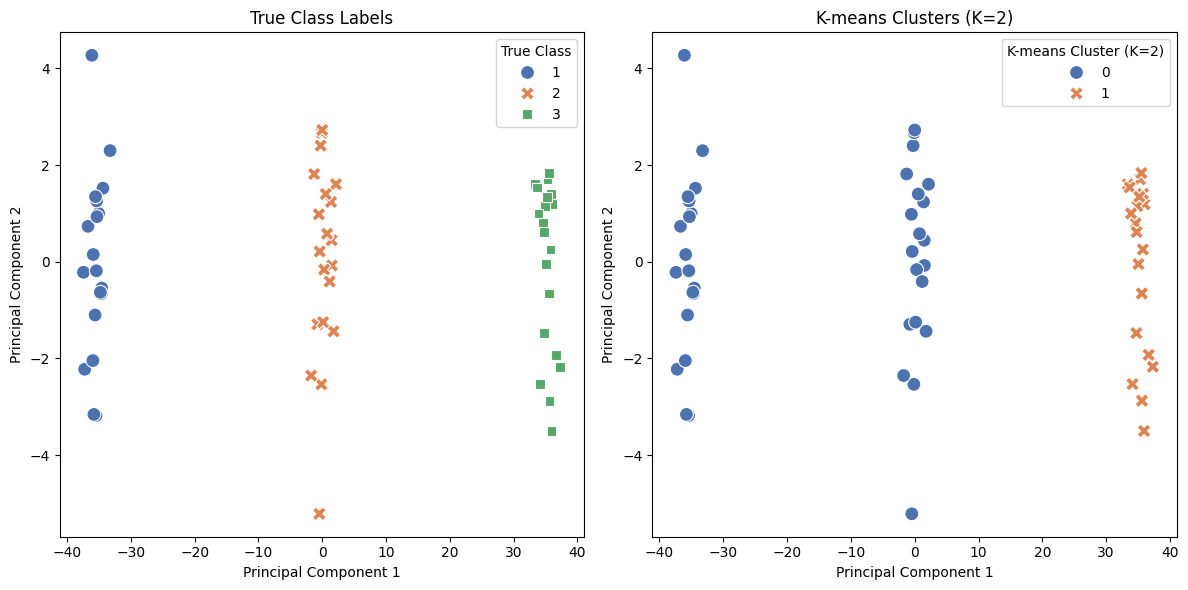

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, :-3].rename(columns=str))  # Exclude 'class', 'kmeans_label', 'kmeans_label_2'

df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='class', data=df, palette='deep', style='class', s=100)
plt.title('True Class Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='True Class')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='kmeans_label_2', data=df, palette='deep', style='kmeans_label_2', s=100)
plt.title('K-means Clusters (K=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-means Cluster (K=2)')

plt.tight_layout()
plt.show()


當K=2 時，K-means 會將數據集劃分為兩個聚類中心，而data實際上有三個類別（真實的類別labbel）。因此，當聚類數少於真實的類別數時，有一個類別會被誤歸為其他兩類之一。

解釋結果：透過交叉表，你應該可以看到某一個或多個真實類別被錯誤分配到了其他兩個聚類中。這可能會表明當K=2 時，K-means 不能很好地區分三個類別，因為它強制將data分為兩組。

### (e) Now perform K-means clustering with K = 4, and describe your results.


In [28]:
from sklearn.cluster import KMeans
import pandas as pd

kmeans_4 = KMeans(n_clusters=4, random_state=42)

kmeans_labels_4 = kmeans_4.fit_predict(df.iloc[:, :-3].rename(columns=str))  # Exclude original 'class', 'kmeans_label', and 'kmeans_label_2' columns

df['kmeans_label_4'] = kmeans_labels_4

comparison_4 = pd.crosstab(df['class'], df['kmeans_label_4'], rownames=['True Class'], colnames=['K-means Cluster (K=4)'])

comparison_4


K-means Cluster (K=4),0,1,2,3
True Class,,,,
1,0,0,20,0
2,8,0,0,12
3,0,20,0,0


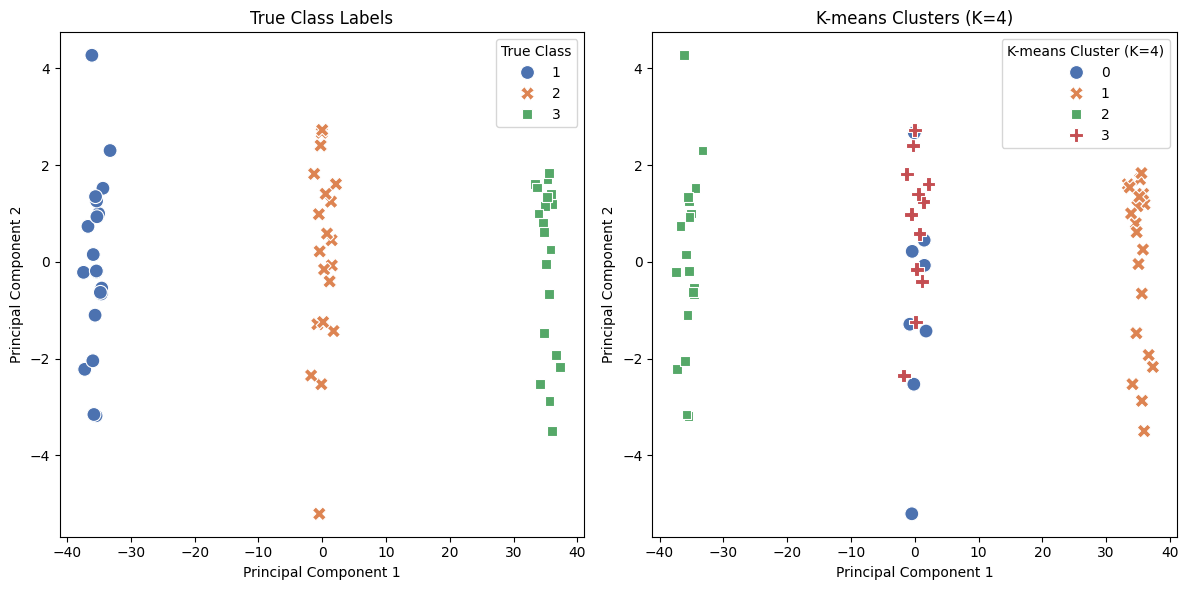

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, :-4].rename(columns=str))  # Exclude 'class', 'kmeans_label', 'kmeans_label_2', 'kmeans_label_4'

df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='class', data=df, palette='deep', style='class', s=100)
plt.title('True Class Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='True Class')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='kmeans_label_4', data=df, palette='deep', style='kmeans_label_4', s=100)
plt.title('K-means Clusters (K=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-means Cluster (K=4)')

plt.tight_layout()
plt.show()

### (f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.


In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.iloc[:, :-4])  # Exclude 'class', 'kmeans_label', 'kmeans_label_2', 'kmeans_label_4'

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(principal_components)

pc_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pc_df['kmeans_pca_label'] = kmeans_pca_labels
pc_df['true_class'] = df['class']

comparison_pca = pd.crosstab(pc_df['true_class'], pc_df['kmeans_pca_label'], rownames=['True Class'], colnames=['K-means Cluster (PCA)'])

comparison_pca


K-means Cluster (PCA),0,1,2
True Class,,,
1,0,0,20
2,20,0,0
3,0,20,0


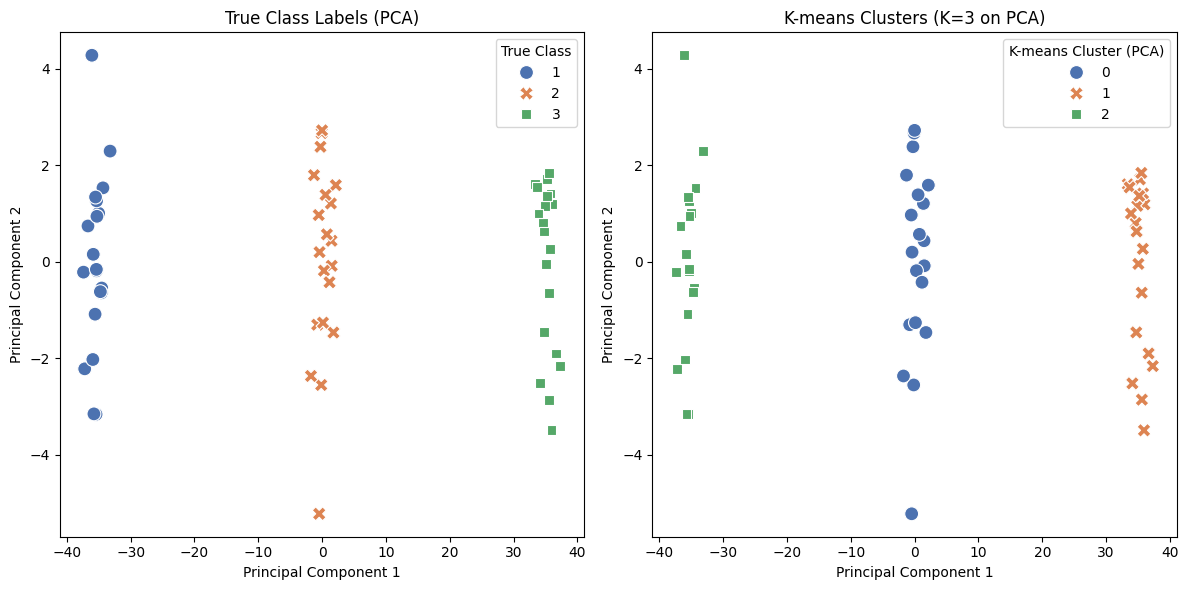

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='true_class', data=pc_df, palette='deep', style='true_class', s=100)
plt.title('True Class Labels (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='True Class')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='kmeans_pca_label', data=pc_df, palette='deep', style='kmeans_pca_label', s=100)
plt.title('K-means Clusters (K=3 on PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-means Cluster (PCA)')

plt.tight_layout()
plt.show()


當在前兩個主成分向量上執行 K=3 的 K-means 聚類時，這樣的做法有助於減少data的維度並保留最具解釋性的變量。在此情況下：

PCA 的效果：前兩個主成分向量已經捕捉到了data 的 max mean square，這通常意味著它們能夠很好地代表data的主要結構。透過在這些向量上進行 K-means，可以提高聚類的準確性和視覺化效果，因為冗餘的變量和噪音被過濾掉了。

圖表結果：這個交叉表將顯示在主成分空間上的聚類結果與真實類別標籤的比較。相比於直接在原始數據上進行 K-means，主成分空間上的 K-means 可能更容易成功將數據分為三個聚類，因為 PCA 幫助進行了data的dimention reduction。

聚類效果：如果三個類別之間的差異主要反映在前兩個主成分中，那麼聚類結果應該會比在原始 50 維data上更好。這會反映在交叉表中，真實類別與聚類結果之間的對應可能會更準確。

如果聚類效果變好了，這可能證實了 PCA 對去除data的多餘維度和noise有幫助。如果結果和之前差不多或更差，則說明data的有用訊息並未集中在前兩個principle component中。

### (g) Using the StandardScaler() estimator, perform K-means clus- tering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-4])  # Exclude 'class', 'kmeans_label', 'kmeans_label_2', 'kmeans_label_4'

kmeans_scaled = KMeans(n_clusters=3, random_state=42)
kmeans_scaled_labels = kmeans_scaled.fit_predict(scaled_data)

df['kmeans_scaled_label'] = kmeans_scaled_labels

comparison_scaled = pd.crosstab(df['class'], df['kmeans_scaled_label'], rownames=['True Class'], colnames=['K-means Cluster (Scaled)'])

comparison_scaled


K-means Cluster (Scaled),0,1,2
True Class,,,
1,0,0,20
2,20,0,0
3,0,20,0


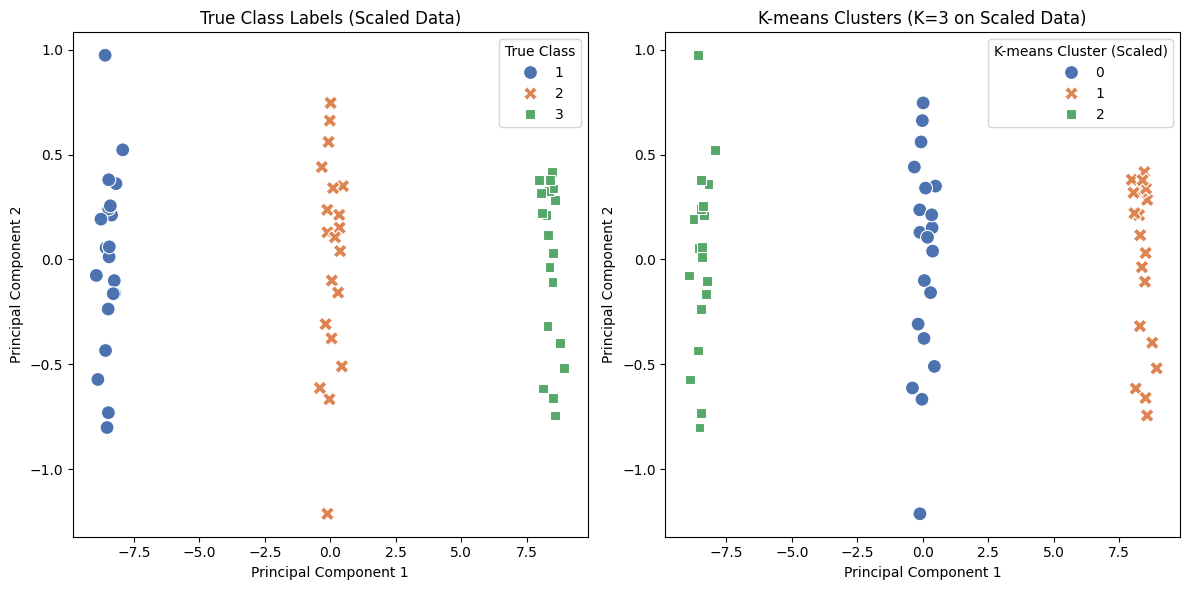

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_scaled_result = pca.fit_transform(scaled_data)

pc_scaled_df = pd.DataFrame(pca_scaled_result, columns=['PC1', 'PC2'])
pc_scaled_df['kmeans_scaled_label'] = kmeans_scaled_labels
pc_scaled_df['true_class'] = df['class']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='true_class', data=pc_scaled_df, palette='deep', style='true_class', s=100)
plt.title('True Class Labels (Scaled Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='True Class')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='kmeans_scaled_label', data=pc_scaled_df, palette='deep', style='kmeans_scaled_label', s=100)
plt.title('K-means Clusters (K=3 on Scaled Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-means Cluster (Scaled)')

plt.tight_layout()
plt.show()


* 進行標準化：有時候，數據集中的變量可能具有不同的尺度，例如一個變量的取值範圍可能是 0 到 100，而另一個變量的取值範圍可能是 0 到 1。

* 這種變量之間的尺度差異會導致 K-means 聚類算法更依賴於方差較大的變量，因為 K-means 是基於歐氏距離的。標準化將每個變量的平均值調整為 0，標準差調整為 1，可以使所有變量在聚類時具有相同的權重。

### 與 (b) 的比較：

如果在 (b) 中三個類別之間的分離效果不好，這可能是因為某些變量對距離計算的影響過大。在標準化後，每個變量的貢獻變得更加平衡，因此聚類結果可能會變得更加合理，三個類別之間的分離效果應該會有所改善。

如果標準化後的結果與 (b) 相比變得更好，則說明在未標準化的data，一些變量的scale差異對聚類結果造成了不利影響。

如果標準化後的結果與 (b) 相似，則說明data的變量之間的尺度差異不大，標準化對結果影響不顯著。
交叉表結果：通過交叉表可以比較真實類別和聚類標籤。如果標準化之後，交叉表顯示更好的對應性（即類別分配更精確），那麼標準化對結果有積極影響。